In [6]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt   

TF_ENABLE_ONEDNN_OPTS=0


len_max = 38
abcedario  =  ["a", "b" ,"c",  "d" , "e",  "f" , "g",  "h",  "i" , "j",  "k" , "l ", "m" , "n", "o",  "p", "q",  "r", "s",   "t",  "u" ,  "v" , "w" , "x", "y", "z" , "-", "/", "á" , "é" , "í", "ó",  "ú",  "ñ",  "1" , "2", "3", "4","5", "6", "7", "8","9","0"]
numeracion =  [97 , 98 , 99 , 100  ,101  ,102  ,103 , 104 , 105,  106 , 107 , 108  ,109 , 110 , 111 ,112 , 113 ,114 , 115 , 116  ,117 , 118  ,119 , 120  ,121 , 122 , 45,  47,  160, 130,  161,  162,  163,  164,  49,   50,  51, 52,  53,  54,  55, 56, 57,48]   # numeracioen de esta pagina https://elcodigoascii.com.ar/codigos-ascii-extendidos/letra-e-minuscula-acento-agudo-codigo-ascii-130.html

def ASCIIfuncLetter(letter):
    d = 0
    for i in range(len(abcedario)):
        if letter == abcedario[i]:
            d = numeracion[i]
            return d
    return d

def ASCIIfuncNum(num):
  d = " "
  for i in range(len(numeracion)):
      if num == numeracion[i]:
          d = abcedario[i]
          return d
  return d


def TxttoNum(word):
  Num = []
  for i in range(len(word)):
      Num.append(ASCIIfuncLetter(word.lower()[i]))
  return Num

def NumtoTxt(num):
  Txt = ""
  for i in range(len(num)):
      Txt = Txt + ASCIIfuncNum(num[i])
  return Txt

def Predic(Palabra, model):
  input = TxttoNum(Palabra)
  if len(input) < len_max:
      input.extend([0] * (len_max - len(input)))  # Rellenar con ceros
  elif len(input) > len_max:
      input = input[:len_max]  # Truncar si es más largo
  input = np.array(input, dtype='float32')
  input = np.reshape(input, (1, len_max))
  prediccion = model.predict(input, verbose=0)
  if prediccion > 0.5:
     prediccion = 1
  else:
      prediccion = 0
  return prediccion

In [7]:
with open('data_validacion.txt', 'r') as archivo:
    lineas = archivo.readlines()
print(lineas)

entrenamiento = []
for linea in lineas:
    linea = linea.replace('\n', '')
    entrenamiento.append(linea)
print(entrenamiento)

['eternatus\n', 'goomy\n', 'slakoth\n', 'shelgon\n', 'heatran\n', 'ibuprofeno\n', 'ondansetron\n', 'cubchoo\n', 'acetilcisteina\n', 'adjupanrix\n', 'deerling\n', 'trimebutino\n', 'armaya\n', 'carvanha\n', 'skuntank\n', 'bidoof\n', 'corsola\n', 'ameluz\n', 'bagon\n', 'machop\n', 'tepig\n', 'regice\n', 'relicanth\n', 'benzocaina\n', 'lunatone\n', 'cetilpiridinio\n', 'aileva\n', 'acarizax\n', 'skiploom\n', 'drapion\n', 'hitmonlee\n', 'sunflora\n', 'nidoqueen\n', 'amikacina\n', 'nosepass\n', 'aldocumar\n', 'marill\n', 'garbodor\n', 'arrox\n', 'tornadus\n', 'mew\n', 'arzolan\n', 'ribombee\n', 'pansear\n', 'poochyena\n', 'medicham\n', 'actrapid\n', 'actikerall\n', 'paras\n', 'artiss\n', 'angileptol\n', 'donphan\n', 'noscapina\n', 'dolliv\n', 'haloperidol\n', 'groudon\n', 'dragonite\n', 'scovillain\n', 'eritromicina\n', 'metronidazol\n', 'gorebyss\n', 'whimsicott\n', 'hidrocloritiazida\n', 'sobble\n', 'ivermectina\n', 'lansoprazol\n', 'sandile\n', 'centiskorch\n', 'arvalti\n', 'purugly\n', 'd

In [8]:
with open('data_validacion_etiqueta.txt', 'r') as archivo:
    lineas = archivo.readlines()
print(lineas)

entrenamiento_etiqueta = []
for linea in lineas:
    linea = linea.replace('\n', '')
    entrenamiento_etiqueta.append(int(linea))
print(entrenamiento_etiqueta)

['0\n', '0\n', '0\n', '0\n', '0\n', '1\n', '1\n', '0\n', '1\n', '1\n', '0\n', '1\n', '1\n', '0\n', '0\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '0\n', '0\n', '1\n', '0\n', '1\n', '1\n', '1\n', '0\n', '0\n', '0\n', '0\n', '0\n', '1\n', '0\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '0\n', '1\n', '1\n', '0\n', '1\n', '1\n', '0\n', '1\n', '0\n', '1\n', '0\n', '0\n', '0\n', '1\n', '1\n', '0\n', '0\n', '1\n', '0\n', '1\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '0\n', '1\n', '0\n', '0\n', '0\n', '0\n', '0\n', '1\n', '1\n', '1\n', '0\n', '0\n', '0\n', '0\n', '0\n', '0\n', '0\n', '1\n', '1\n', '0\n', '0\n', '0\n', '1\n', '1\n', '0\n', '0\n', '1\n', '1\n', '0\n', '0\n', '1\n', '1\n', '0\n', '1\n', '0\n', '1\n', '0\n', '1\n', '1\n', '0\n', '0\n', '0\n', '1\n', '1\n', '1\n', '1\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '0\n', '0\n', '1\n', '1\n', '0\n', '1\n', '1\n', '0\n', '0\n', '0\n', '0\n', '1\n', '1\n', '1\n', '0\n', '1\n', '1\n', '1\n'

In [9]:
cantidad_0 = entrenamiento_etiqueta.count(0)
cantidad_1 = entrenamiento_etiqueta.count(1)


In [10]:
list_bien = []
falso_positivo = []
falso_negativo = []

for i in range(30):
    modelo = load_model("red_POKMED"  + str(10 + i*5) + ".keras")
    bien = 0
    f_p = 0
    f_n = 0
    for k in range(len(entrenamiento)):
      if Predic(entrenamiento[k], modelo) == entrenamiento_etiqueta[k]:
        bien += 1
      if entrenamiento_etiqueta[k] == 0 and Predic(entrenamiento[k], modelo) == 1:
        f_p += 1
      if entrenamiento_etiqueta[k] == 1 and Predic(entrenamiento[k], modelo) == 0:
        f_n += 1
    list_bien.append( bien / len(entrenamiento) )
    falso_positivo.append(f_p / cantidad_0 )
    falso_negativo.append(f_n / cantidad_1 )

In [17]:
print(list_bien)

[0.6927374301675978, 0.6759776536312849, 0.6536312849162011, 0.6983240223463687, 0.6536312849162011, 0.7039106145251397, 0.6424581005586593, 0.6871508379888268, 0.6871508379888268, 0.7094972067039106, 0.6536312849162011, 0.7094972067039106, 0.7039106145251397, 0.6927374301675978, 0.6815642458100558, 0.7206703910614525, 0.6927374301675978, 0.7486033519553073, 0.6703910614525139, 0.6927374301675978, 0.6871508379888268, 0.6480446927374302, 0.664804469273743, 0.7206703910614525, 0.6703910614525139, 0.7150837988826816, 0.7150837988826816, 0.664804469273743, 0.7206703910614525, 0.6703910614525139]


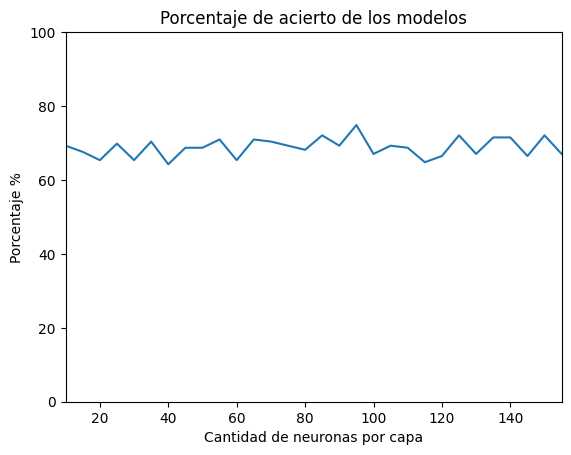

In [18]:
x = np.arange(10, 160, 5)
plt.plot(x,np.array(list_bien) * 100)
plt.title("Porcentaje de acierto de los modelos")
plt.xlabel("Cantidad de neuronas por capa")
plt.ylabel("Porcentaje %")
plt.ylim([0,100])
plt.xlim([10,155])
plt.show()

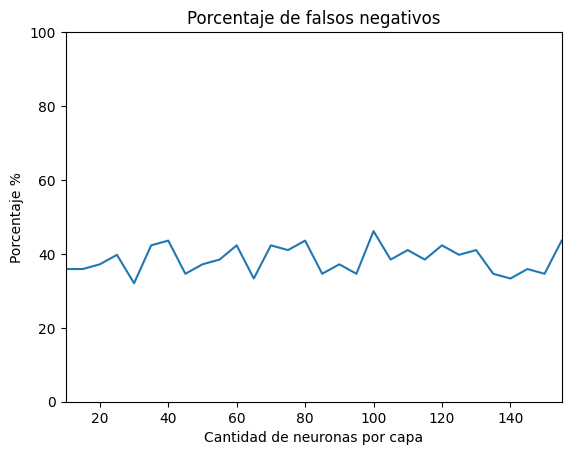

In [19]:
plt.plot(x,np.array(falso_negativo) * 100)
plt.title("Porcentaje de falsos negativos")
plt.xlabel("Cantidad de neuronas por capa")
plt.ylabel("Porcentaje %")
plt.ylim([0,100])
plt.xlim([10,155])
plt.show()

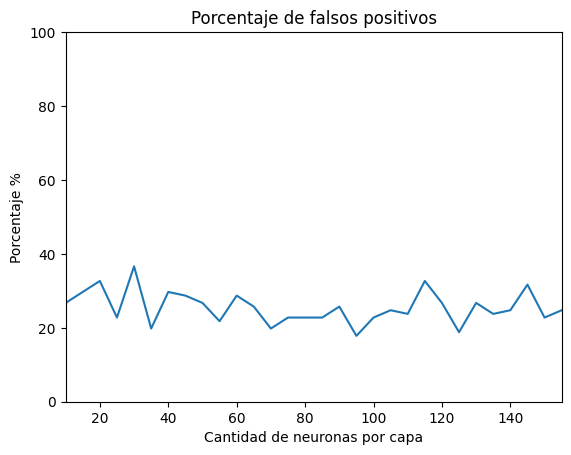

In [20]:
plt.plot(x,np.array(falso_positivo) * 100)
plt.title("Porcentaje de falsos positivos")
plt.xlabel("Cantidad de neuronas por capa")
plt.ylabel("Porcentaje %")
plt.ylim([0,100])
plt.xlim([10,155])
plt.show()

In [21]:
arg_max_nodo = np.argmax(list_bien)
arg_max_nodo
print("Red con más precisión tiene " + str(x[arg_max_nodo]) + " neuronas por capa")

Red con más precisión tiene 95 neuronas por capa


In [22]:
print(list_bien[arg_max_nodo])

0.7486033519553073
